In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [5]:
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target
x=df[['MedInc','HouseAge','AveRooms','Population','AveOccup','Latitude','Longitude']]
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"MAE : {mae:.2f} $100K")
print(f"RMSE : {rmse:.2f} $100K")
print(f"R2 : {r2:.2f}")

MAE : 0.54 $100K
RMSE : 0.74 $100K
R2 : 0.58


In [6]:
residuals=y_test-y_pred
print("\nFirst 5 Residuals:")
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residual':residuals[:5]}))


First 5 Residuals:
        Actual  Predicted  Residual
20046  0.47700   0.735589 -0.258589
3024   0.45800   1.750606 -1.292606
15663  5.00001   2.470126  2.529884
20484  2.18600   2.884449 -0.698449
9814   2.78000   2.714366  0.065634


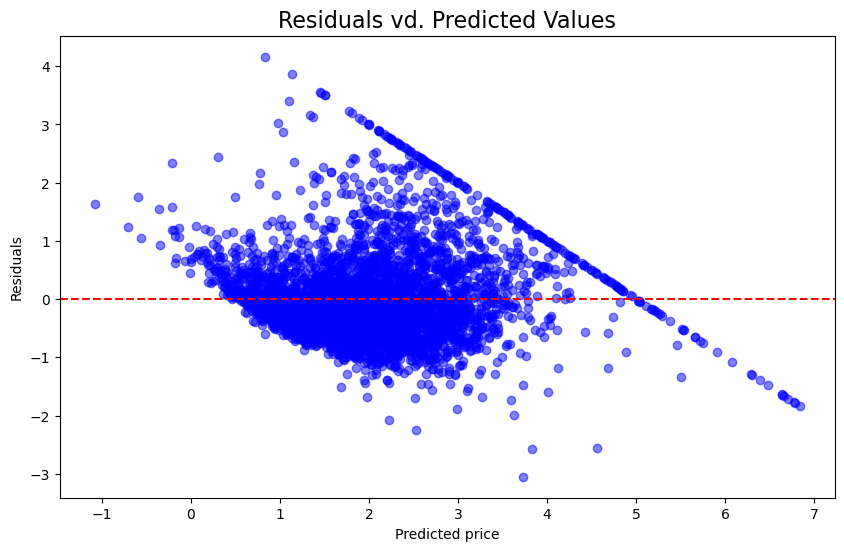

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,color='blue',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Residuals vd. Predicted Values',fontsize=16)
plt.xlabel('Predicted price')
plt.ylabel('Residuals')
plt.show()

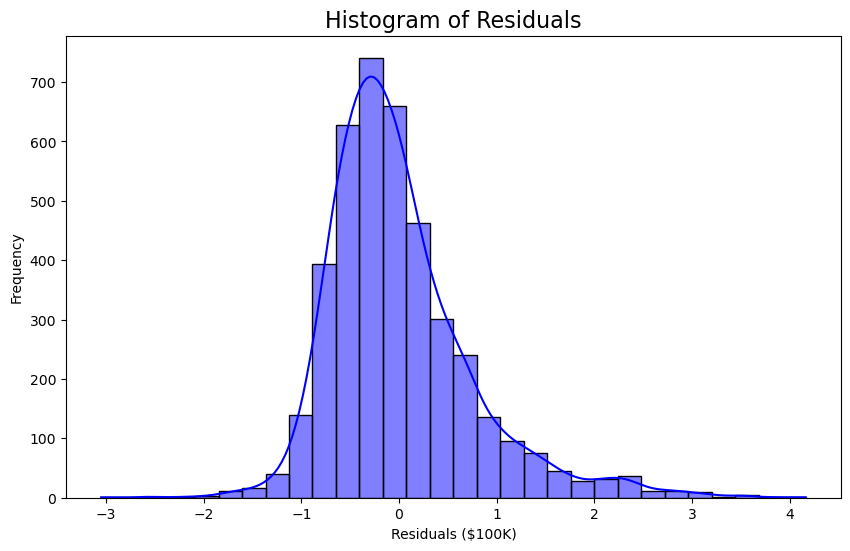

In [8]:
#histogram of residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='blue')
plt.title('Histogram of Residuals',fontsize=16)
plt.xlabel('Residuals ($100K)')
plt.ylabel('Frequency')
plt.show()
#Good:Bell Shaped curve  

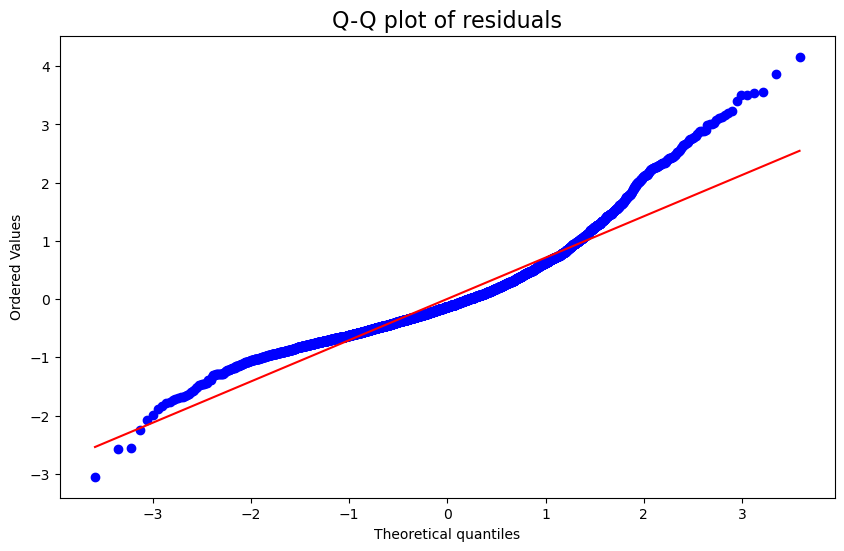

In [11]:
#Q-Q plot(normality check for residuals)
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals,dist="norm",plot=plt)
plt.title('Q-Q plot of residuals',fontsize=16)
plt.show()
#good:points follow the red line
#bad:Big deviations

**Standardiation vs Normalization**

In [23]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
x,y=make_regression(n_samples=100,n_features=2,noise=50)
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(model,x,y,cv=kf,scoring='r2')
print("Cross-validation scores:",scores)
print("Average Score:",scores.mean())

Cross-validation scores: [0.85007405 0.85690967 0.91669178 0.8916992  0.92741984]
Average Score: 0.8885589085653347
